In [3]:
#Importing required libraries;
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [29]:
#Loading the dataset;
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

In [30]:
#Displaying the top 5 rows;
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
#Checking the data type of dataset;
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [32]:
#Statistical summary of the dataframe;
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
#Dropping column id & unnamed from the dataframe;
df = df.drop(["id", "Unnamed: 0"], axis=1)


In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
#checking missing values 
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [36]:
#We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace()
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

#We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace()
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


C:\Users\HAROON TRADERS\AppData\Local\Temp\ipykernel_4736\2650755069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)
C:\Users\HAROON TRADERS\AppData\Local\Temp\ipykernel_4736\2650755069.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [38]:
#Counting number of hourses with unique floor values;
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


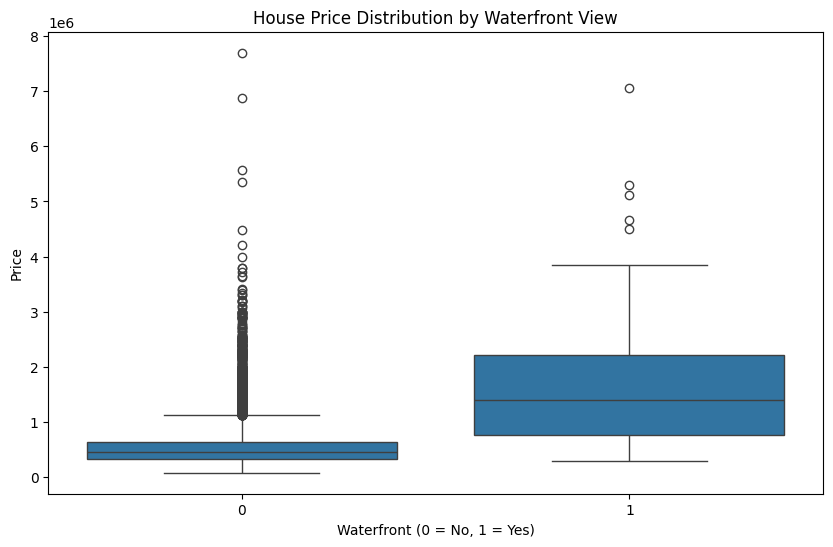

In [43]:
# determining whether houses with a waterfront view or without a waterfront view have more price outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('House Price Distribution by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

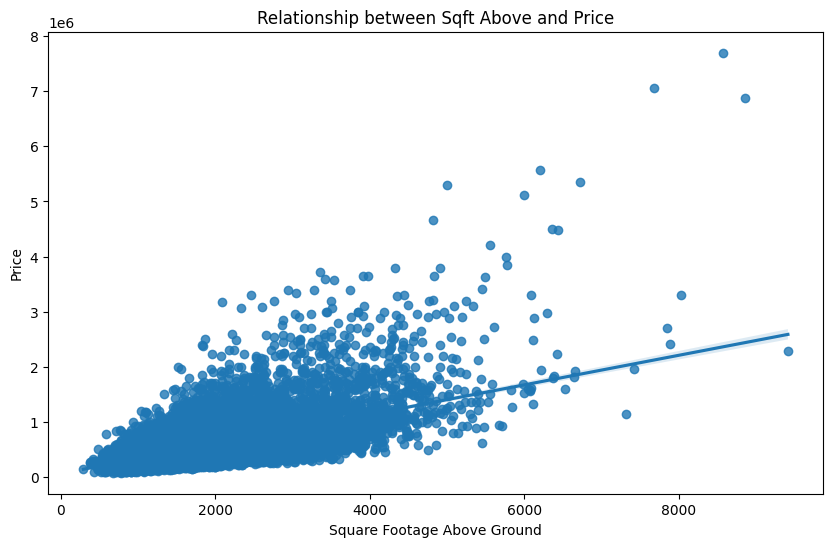

In [44]:
# determine if the feature sqft_above is negatively or positively correlated with price.
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title("Relationship between Sqft Above and Price")
plt.xlabel("Square Footage Above Ground")
plt.ylabel("Price")
plt.show()

In [46]:
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price.
# Select only numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlations and sort them by the 'price' correlation
price_corr = df_numeric.corr()['price'].sort_values()
print(price_corr)

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


Trying different variants or features for best model results;

In [47]:
###Building model 
#We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [48]:
X = df[['sqft_living']]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the R^2 score (coefficient of determination)
r_squared = model.score(X, y)
print("R^2:", r_squared)

R^2: 0.4928532179037931


In [50]:
# List of features to use for prediction
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

# Define the predictor variables (X) and the target variable (y)
X = df[features]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the R² score on the training data
r_squared = model.score(X, y)
print("R^2:", r_squared)

R^2: 0.6576951666037498


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Creating the pipeline:
pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', LinearRegression())
])

# Fitting the pipeline to the data
pipeline.fit(X, y)

# Predicting the target variable
y_pred = pipeline.predict(X)

# Calculating the R^2 score
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.7513


In [54]:
##Model Evaluation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Splitting data into training and test set;
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [58]:
from sklearn.linear_model import Ridge

X = df[features]  # Selecting the feature columns
y = df['price']   # Target variable

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the pipeline with Ridge regression
pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', Ridge(alpha=0.1))  # Ridge regression with regularization parameter 0.1
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predicting the target variable on the test set
y_pred = pipeline.predict(X_test)

# Calculating the R^2 score on test data
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Data: {r2:.4f}")

R^2 Score on Test Data: 0.7112


<h4>As we see that the model with Linear Regression performs better than Ridge Regression...